In [3]:
#pip install dependencies
#RUN THIS CELL ONLY ONCE
!pip install pandas
!pip install numpy
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp313-cp313-win_amd64.whl.metadata (168 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.3-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


In [1]:
#the imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('student_prediction.csv')
#this is the data that will be using

In [8]:
df

,studentid,age,gender,hs_type,scholarship,work,activity,partner,salary,transport,...,prep_study,prep_exam,notes,listens,likes_discuss,classroom,cuml_gpa,exp_gpa,course id,grade
0,STUDENT1,22-25,Male,Other,50%,Yes,No,No,$135-200,Bus,...,Alone,Closest date to the exam,Always,Sometimes,Never,Useful,<2.00,<2.00,1,1
1,STUDENT2,22-25,Male,Other,50%,Yes,No,No,$135-200,Bus,...,Alone,Closest date to the exam,Always,Sometimes,Always,Useful,2.00-2.49,2.50-2.99,1,1
2,STUDENT3,22-25,Male,State,50%,No,No,No,$201-270,Other,...,Alone,Closest date to the exam,Sometimes,Sometimes,Never,Not useful,2.00-2.49,2.00-2.49,1,1
3,STUDENT4,18-21,Female,Private,50%,Yes,No,Yes,$201-270,Bus,...,Alone,Regularly during the semester,Always,Sometimes,Sometimes,Not useful,2.50-2.99,2.00-2.49,1,1
4,STUDENT5,22-25,Male,Private,50%,No,No,Yes,$271-340,Bus,...,With friends,Closest date to the exam,Sometimes,Sometimes,Sometimes,Not useful,2.00-2.49,2.00-2.49,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,22-25,Female,State,50%,Yes,Yes,No,$135-200,Bus,...,Alone,Closest date to the exam,Sometimes,Never,Sometimes,Not useful,2.50-2.99,2.50-2.99,9,5
141,STUDENT142,18-21,Female,State,75%,No,No,No,$135-200,Other,...,Alone,Closest date to the exam,Always,Sometimes,Sometimes,Not useful,Above 3.49,2.50-2.99,9,5
142,STUDENT143,18-21,Female,Private,75%,No,No,No,$135-200,Bus,...,Alone,Closest date to the exam,Always,Always,Sometimes,Not useful,3.00-3.49,2.50-2.99,9,1
143,STUDENT144,22-25,Female,State,75%,Yes,Yes,Yes,Above $410,Private car/taxi,...,With friends,Closest date to the exam,Sometimes,Never,Sometimes,Not useful,Above 3.49,2.50-2.99,9,4


# Data Cleaning

In [4]:
df.isnull().sum()
#we see that we have no missing values

STUDENTID        0
AGE              0
GENDER           0
HS_TYPE          0
SCHOLARSHIP      0
WORK             0
ACTIVITY         0
PARTNER          0
SALARY           0
TRANSPORT        0
LIVING           0
MOTHER_EDU       0
FATHER_EDU       0
#_SIBLINGS       0
KIDS             0
MOTHER_JOB       0
FATHER_JOB       0
STUDY_HRS        0
READ_FREQ        0
READ_FREQ_SCI    0
ATTEND_DEPT      0
IMPACT           0
ATTEND           0
PREP_STUDY       0
PREP_EXAM        0
NOTES            0
LISTENS          0
LIKES_DISCUSS    0
CLASSROOM        0
CUML_GPA         0
EXP_GPA          0
COURSE ID        0
GRADE            0
dtype: int64

In [5]:
#the data is not very understandable so we will change the values based on the information given in the data description
renaming = {
    'age': {
        1: '18-21',
        2: '22-25',
        3: 'Above 26'
    },
    'gender': {1: 'Female', 2: 'Male'},
    'hs_type': {
        1: 'Private',
        2: 'State',
        3: 'Other'
    },
    'scholarship': {
        1: '0%',
        2: '25%',
        3: '50%',
        4: '75%',
        5: '100%'
    }, 
    'work': {1: 'Yes', 2: 'No'}, 
    'activity': {1: 'Yes', 2: 'No'},
    'partner': {1: 'Yes', 2: 'No'},
    'salary': {
        1: '$135-200',
        2: '$201-270',
        3: '$271-340',
        4: '$341-410',
        5: 'Above $410',
    },
    'transport': {
        1: 'Bus',
        2: 'Private car/taxi',
        3: 'Bicycle',
        4: 'Other'
    }, 
    'living': {
        1: 'Rental',
        2: 'Dormitory',
        3: 'With family',
        4: 'Other'
    },
    'mother_edu': {
        1: 'Primary school',
        2: 'Secondary school',
        3: 'High school',
        4: 'University',
        5: 'MSc.',
        6: 'Ph.D.'
    },
    'father_edu': {
        1: 'Primary school',
        2: 'Secondary school',
        3: 'High school',
        4: 'University',
        5: 'MSc.',
        6: 'Ph.D.'
    }, 
    'kids': {
        1: 'Married',
        2: 'Divorced',
        3: 'Died - one of them or both'
    },
    'mother_job': {
        1: 'Retired',
        2: 'Housewife',
        3: 'Government officer',
        4: 'Private sector employee',
        5: 'Self-employment',
        6: 'Other'
    },
    'father_job': {
        1: 'Retired',
        2: 'Government officer',
        3: 'Private sector employee',
        4: 'Self-employment',
        5: 'Other'
    },
    'study_hrs': {
        1: 'None',
        2: '<5 hours',
        3: '6-10 hours',
        4: '11-20 hours',
        5: 'More than 20 hours'
    },
    'read_freq': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Often'
    },
    'read_freq_sci': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Often'
    },
    'attend_dept': {1: 'Yes', 2: 'No'},
    'impact': {
        1: 'Positive',
        2: 'Negative',
        3: 'Neutral'
    },
    'attend': {1: 'Yes', 2: 'No'},
    'prep_study': {
        1: 'Alone',
        2: 'With friends',
        3: 'Not applicable'
    },
    'prep_exam': {
        1: 'Closest date to the exam', 
        2: 'Regularly during the semester',
        3: 'Never'
    },
    'notes': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'listens': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'likes_discuss': {
        1: 'Never',
        2: 'Sometimes',
        3: 'Always'
    },
    'classroom': {
        1: 'Not useful',
        2: 'Useful',
        3: 'Not applicable'
    },
    'cuml_gpa': {
        1: '<2.00',
        2: '2.00-2.49',
        3: '2.50-2.99',
        4: '3.00-3.49',
        5: 'Above 3.49'
    },
    'exp_gpa': {
        1: '<2.00',
        2: '2.00-2.49',
        3: '2.50-2.99',
        4: '3.00-3.49',
        5: 'Above 3.49'
    }
}

df.columns = [x.lower() for x in df.columns]
for col in df.columns.tolist():
    if col not in list(renaming.keys()):
        continue
    if col == '#_siblings':
        df[col].apply(lambda x: '5 or above' if x == 5 else str(x))
    else:
        df[col] = df[col].map(renaming[col])
df.head()



,studentid,age,gender,hs_type,scholarship,work,activity,partner,salary,transport,...,prep_study,prep_exam,notes,listens,likes_discuss,classroom,cuml_gpa,exp_gpa,course id,grade
0,STUDENT1,22-25,Male,Other,50%,Yes,No,No,$135-200,Bus,...,Alone,Closest date to the exam,Always,Sometimes,Never,Useful,<2.00,<2.00,1,1
1,STUDENT2,22-25,Male,Other,50%,Yes,No,No,$135-200,Bus,...,Alone,Closest date to the exam,Always,Sometimes,Always,Useful,2.00-2.49,2.50-2.99,1,1
2,STUDENT3,22-25,Male,State,50%,No,No,No,$201-270,Other,...,Alone,Closest date to the exam,Sometimes,Sometimes,Never,Not useful,2.00-2.49,2.00-2.49,1,1
3,STUDENT4,18-21,Female,Private,50%,Yes,No,Yes,$201-270,Bus,...,Alone,Regularly during the semester,Always,Sometimes,Sometimes,Not useful,2.50-2.99,2.00-2.49,1,1
4,STUDENT5,22-25,Male,Private,50%,No,No,Yes,$271-340,Bus,...,With friends,Closest date to the exam,Sometimes,Sometimes,Sometimes,Not useful,2.00-2.49,2.00-2.49,1,1


In [6]:
df.to_csv('preprocessed_students.csv', index=False)

now the data is more understandable to us and it is ready to use

In [7]:
#the accent is on the "garde" column and we will try to predict it
df['grade'].mean()

np.float64(3.2275862068965515)

plots based on which we will compare the grades and see some dependencies

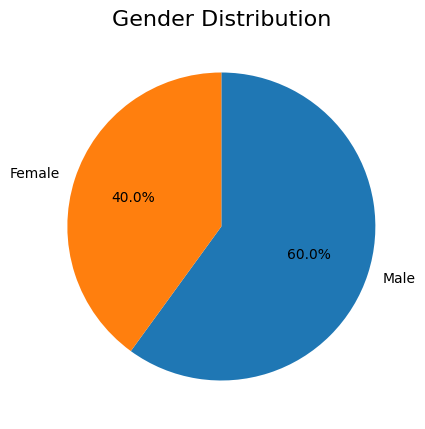

In [81]:
# Gender Distribution
import matplotlib.pyplot as plt
import seaborn as sns

palette = sns.color_palette("pastel")
data = df['gender'].value_counts(normalize=True) * 100

fig1 = plt.figure(figsize=(7, 5))
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
plt.title('Gender Distribution', fontsize=16)
plt.show()

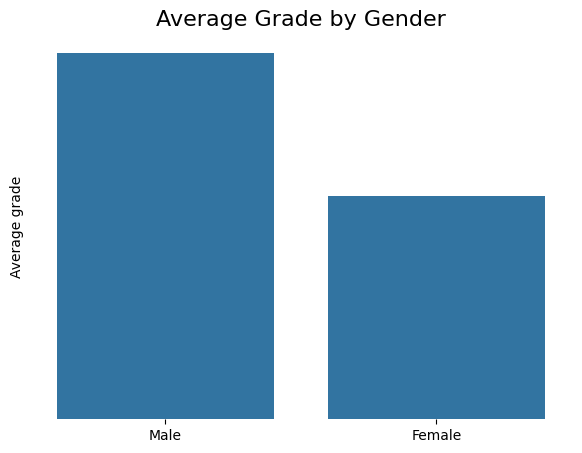

In [82]:
#Average Grade by Gender
data = df.groupby('gender')['grade'].mean().sort_values(ascending=False)

fig2 = plt.figure(figsize=(7, 5))
bp = sns.barplot(x=data.index, y=data)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)
plt.title('Average Grade by Gender', fontsize=16)
plt.show()


the data we use is from a tech university, that is why we see more men students and see their grade being higher

NameError: name 'annotate_bar_plot' is not defined

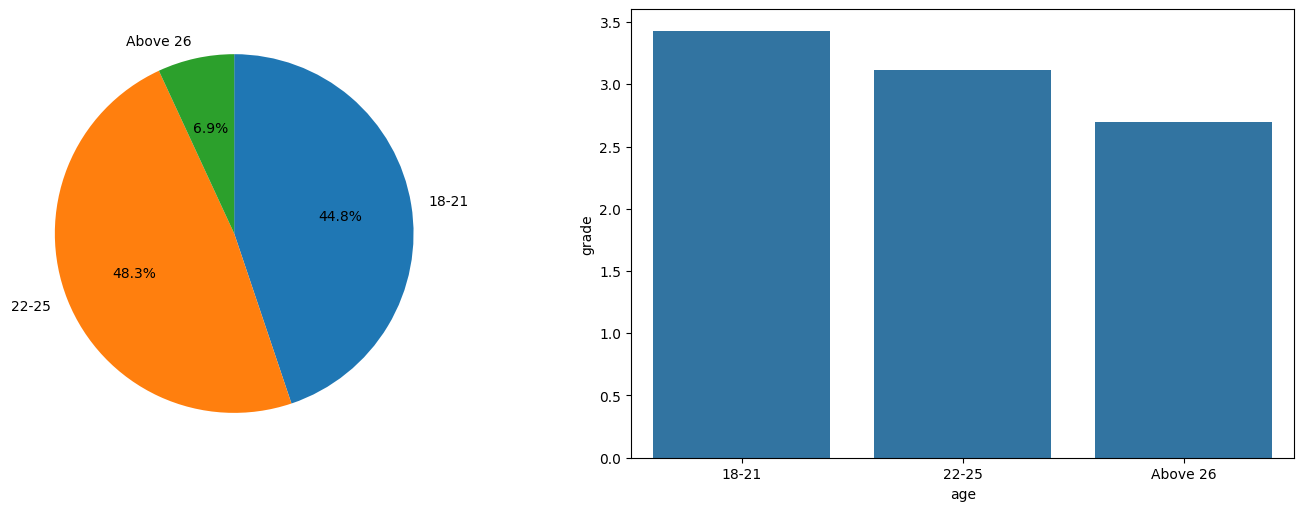

In [83]:
order = list(renaming['age'].values())
data = df['age'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
data = df.groupby('age')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Age', fontsize=18)
plt.show()

the young perform better

NameError: name 'annotate_bar_plot' is not defined

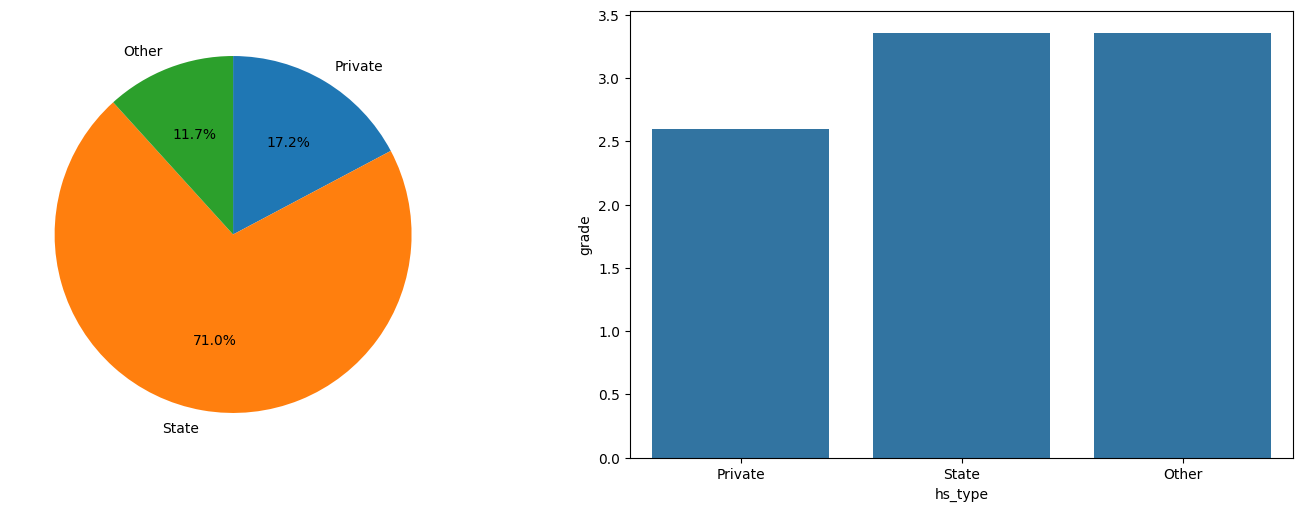

In [ ]:
#Education 
order = list(renaming['hs_type'].values())
data = df['hs_type'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')

data = df.groupby('hs_type')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
annotate_bar_plot(barplot=bp)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Graduated high-school type', fontsize=18)
plt.show()

going to private school doesn't make the students perform better

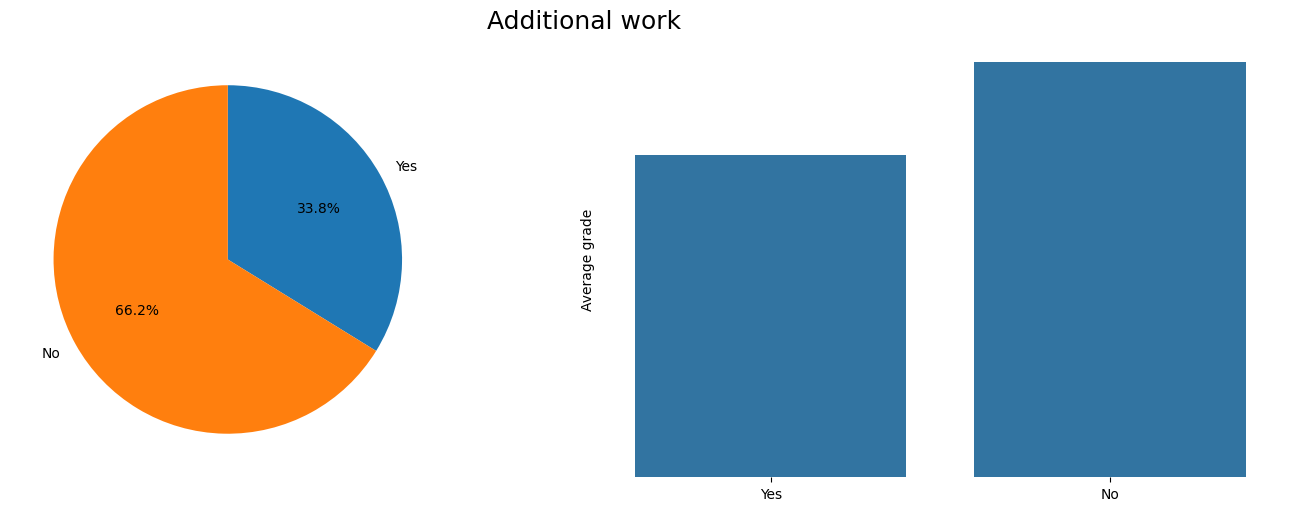

In [45]:
#Job
order = list(renaming['work'].values())
data = df['work'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')

data = df.groupby('work')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Additional work', fontsize=18)
plt.show()

students without a job perform better

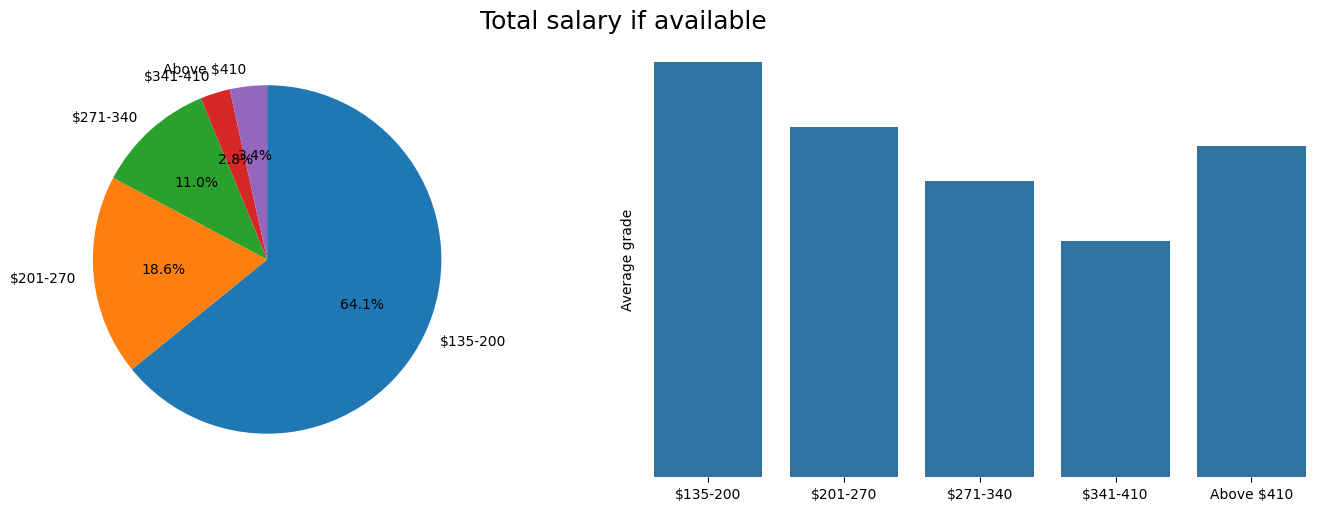

In [ ]:
order = list(renaming['salary'].values())
data = df['salary'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
data = df.groupby('salary')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Total salary if available', fontsize=18)
plt.show()

students that earn less have bigger grade, maybe beacause their job is less demaning

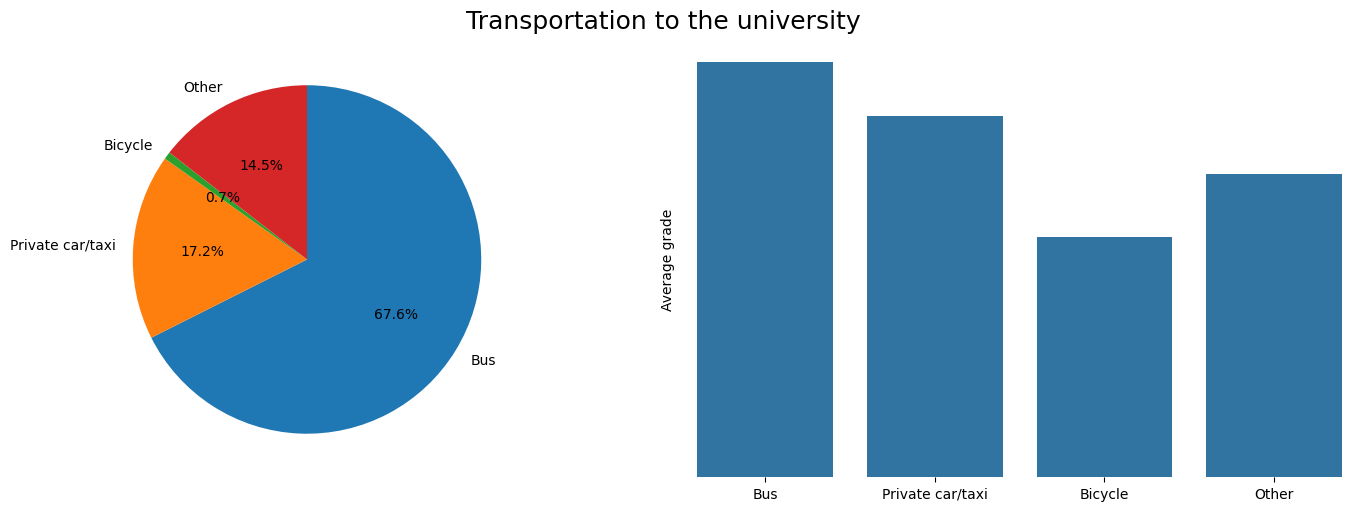

In [ ]:
#Transport
order = list(renaming['transport'].values())
data = df['transport'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
data = df.groupby('transport')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Transportation to the university', fontsize=18)
plt.show()

people that use the bus have better grades

how the garde is influneced by the family:

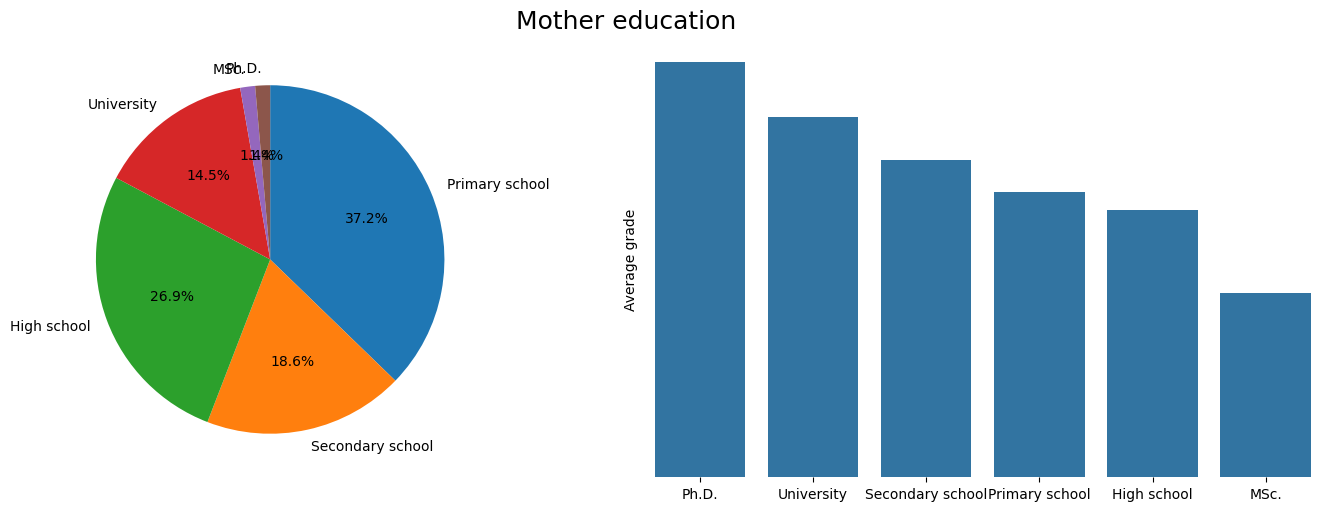

In [ ]:
#mom
order = list(renaming['mother_edu'].values())
data = df['mother_edu'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
data = df.groupby('mother_edu')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Mother education', fontsize=18)
plt.show()


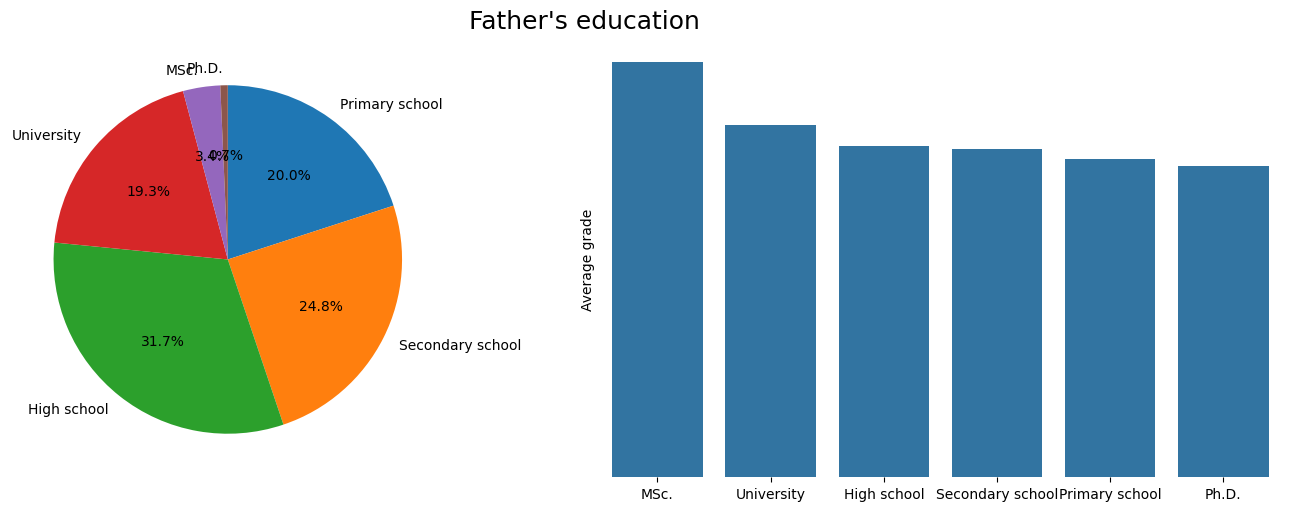

In [38]:
#dad
order = list(renaming['father_edu'].values())
data = df['father_edu'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
data = df.groupby('father_edu')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Father education', fontsize=18)
plt.show()

In general, the higher the father's education, the higher the student's grade
If your dad has a Ph.D., you will not necessarily be a good student, but if you mom has a Ph.D., you are likely to stand out

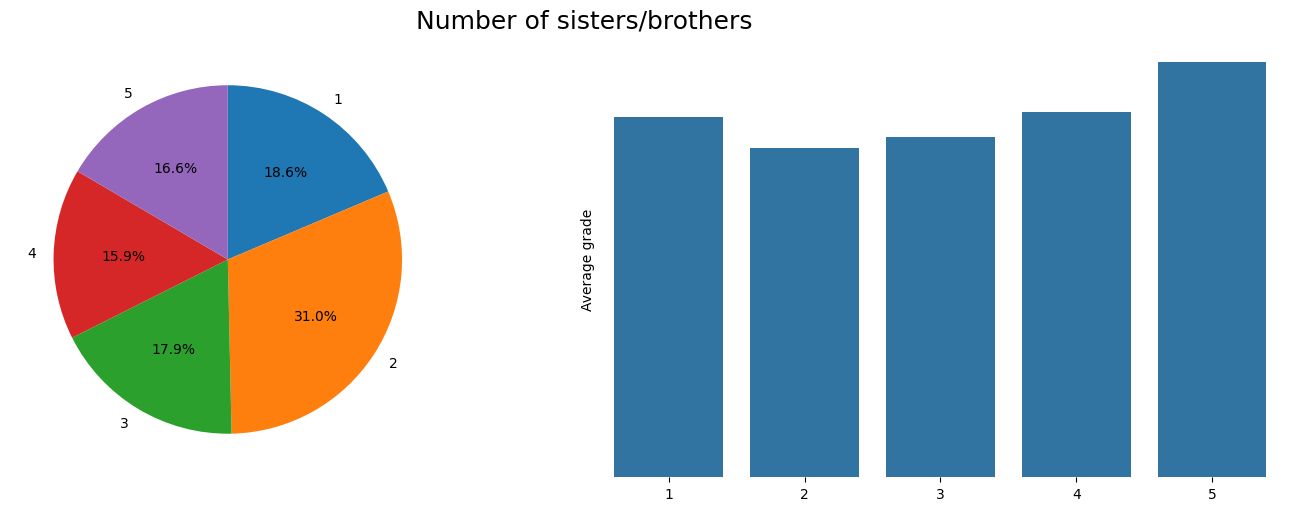

In [ ]:
data = df['#_siblings'].value_counts(normalize=True) * 100
data = data.loc[list(range(1, 6))]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
data = df.groupby('#_siblings')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Number of sisters/brothers', fontsize=18)
plt.show()

except the single children, the more siblings you have, the better the performance(this can be phycological impact)

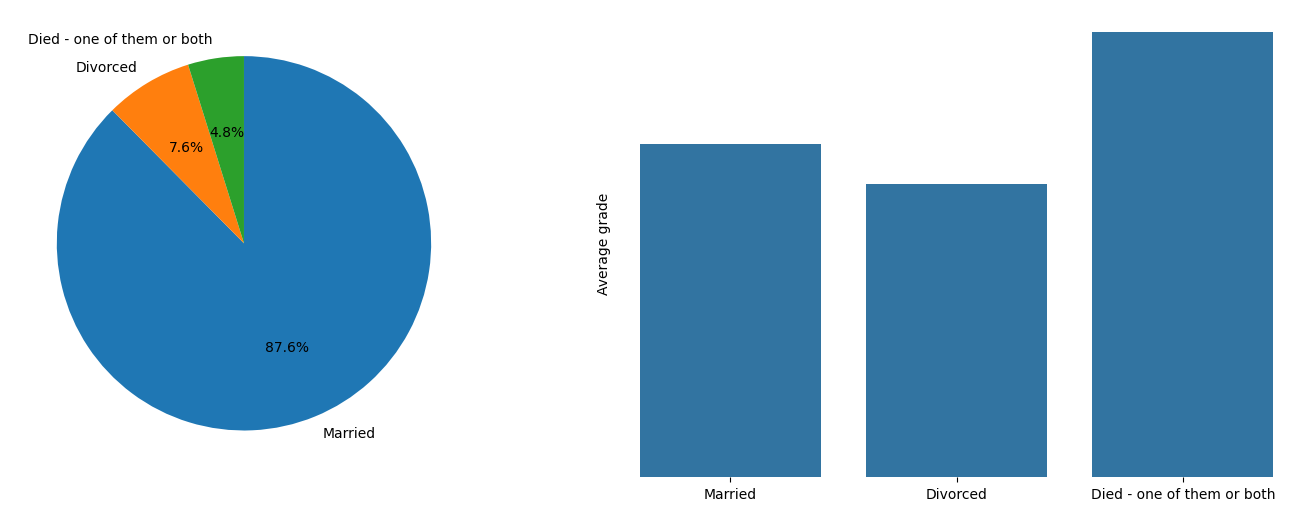

In [ ]:
order = list(renaming['kids'].values())
data = df['kids'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
data = df.groupby('kids')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

plt.show()

the majority have maried parents
the unfortunate children performs much better, maybe because of the preassure the society puts on them

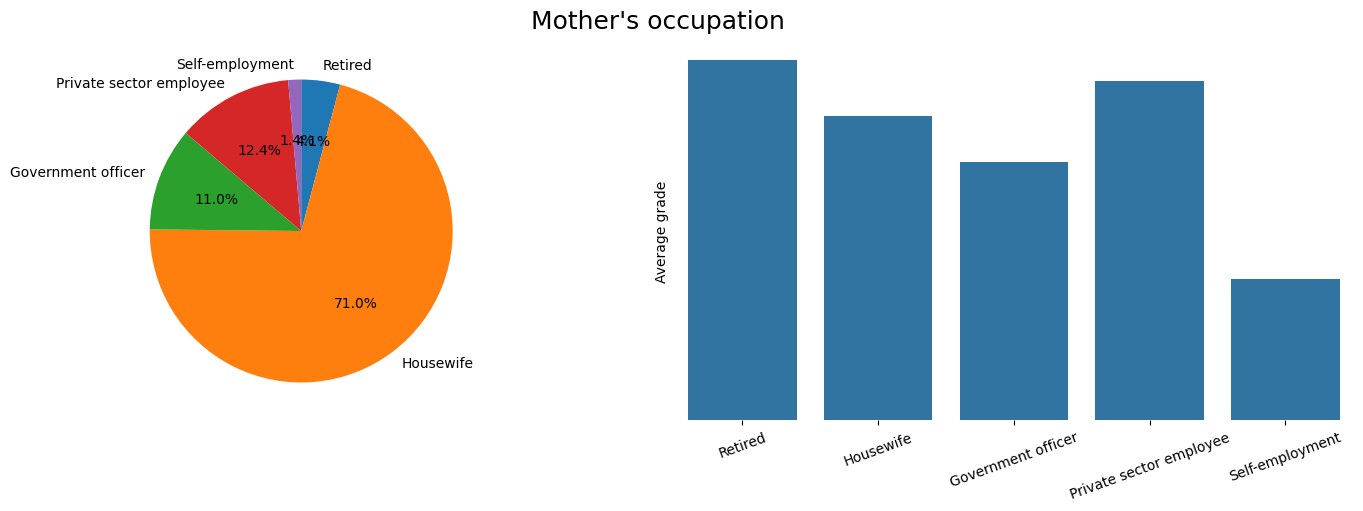

In [52]:
#mom
order = list(renaming['mother_job'].values())
order.remove('Other')
data = df['mother_job'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
data = df.groupby('mother_job')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
plt.xlabel('')
plt.ylabel('Average grade')
plt.xticks(rotation=20)
plt.yticks([])
plt.box(False)

fig.suptitle('Mother\'s occupation', fontsize=18)
plt.show()

mom that retired and focus on the child and house, have students with better grade, maybe because they spend more time on educating the child from young age

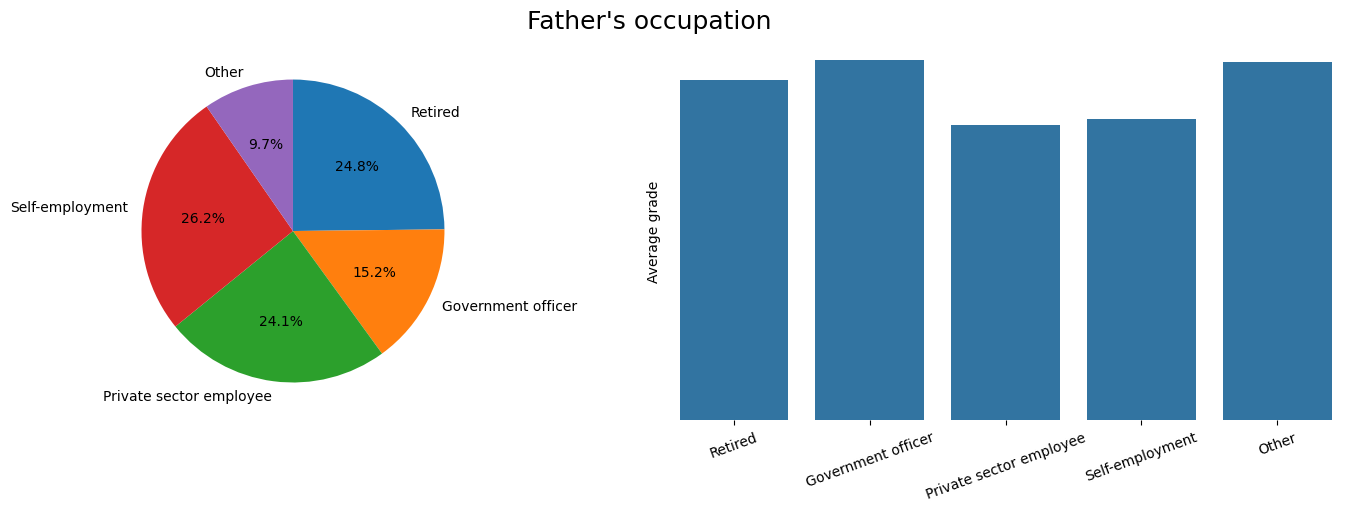

In [53]:
#dad
order = list(renaming['father_job'].values())
data = df['father_job'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
data = df.groupby('father_job')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
plt.xlabel('')
plt.ylabel('Average grade')
plt.xticks(rotation=20)
plt.yticks([])
plt.box(False)

fig.suptitle('Father\'s occupation', fontsize=18)
plt.show()

the dad's ocupation does not seem to have a big impact on the grade

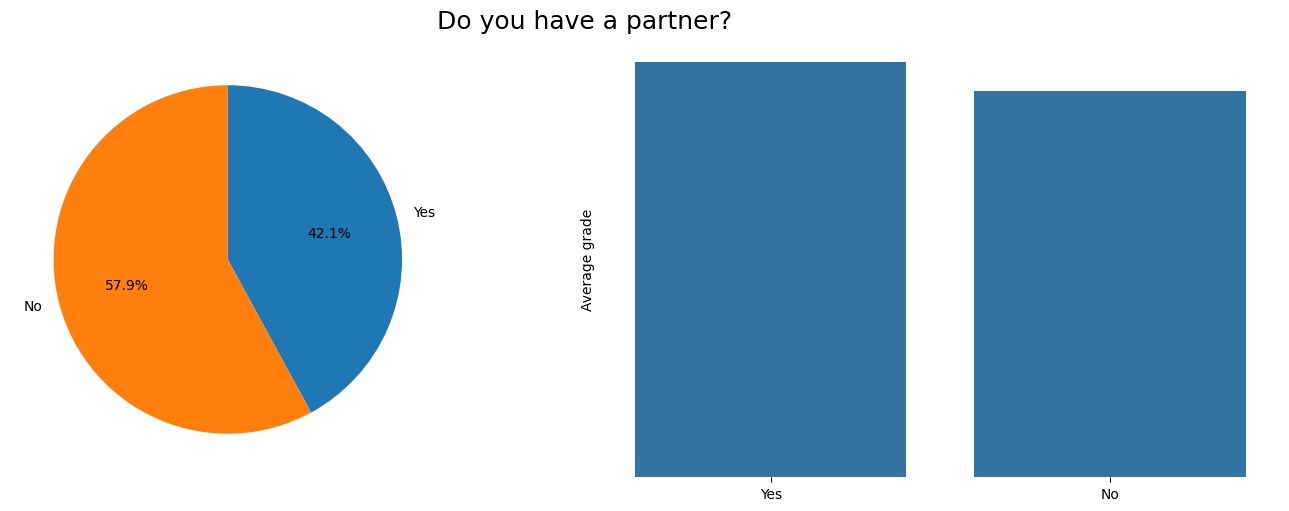

In [ ]:
order = list(renaming['partner'].values())
data = df['partner'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')

data = df.groupby('partner')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Do you have a partner?', fontsize=18)
plt.show()

this doesn't have an impact

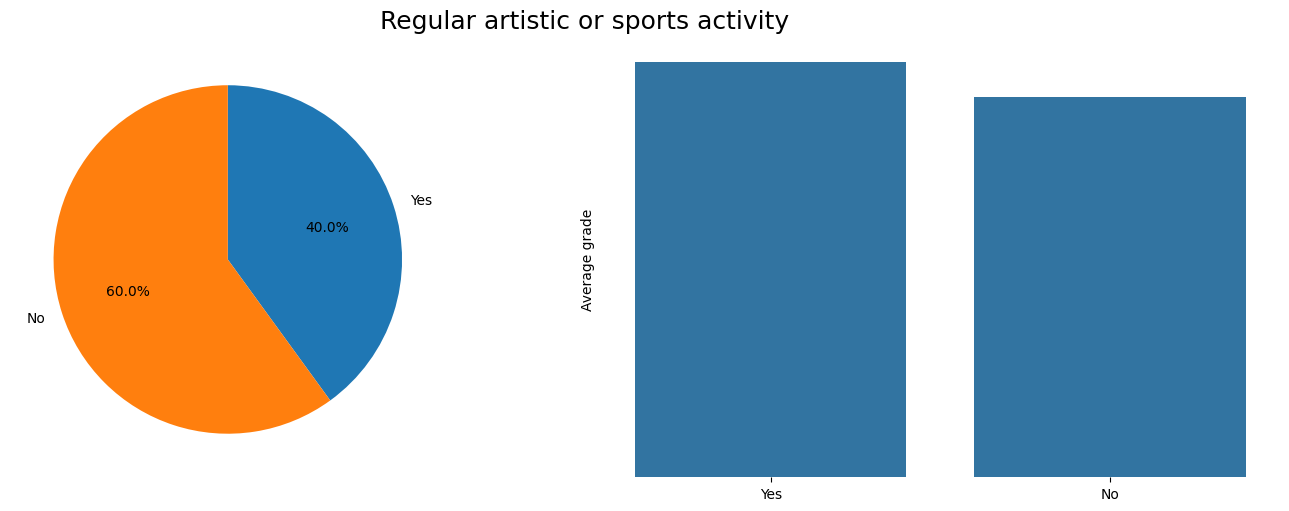

In [56]:
order = list(renaming['activity'].values())
data = df['activity'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')

data = df.groupby('activity')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Regular artistic or sports activity', fontsize=18)
plt.show()

having a regular activity influnces the grade

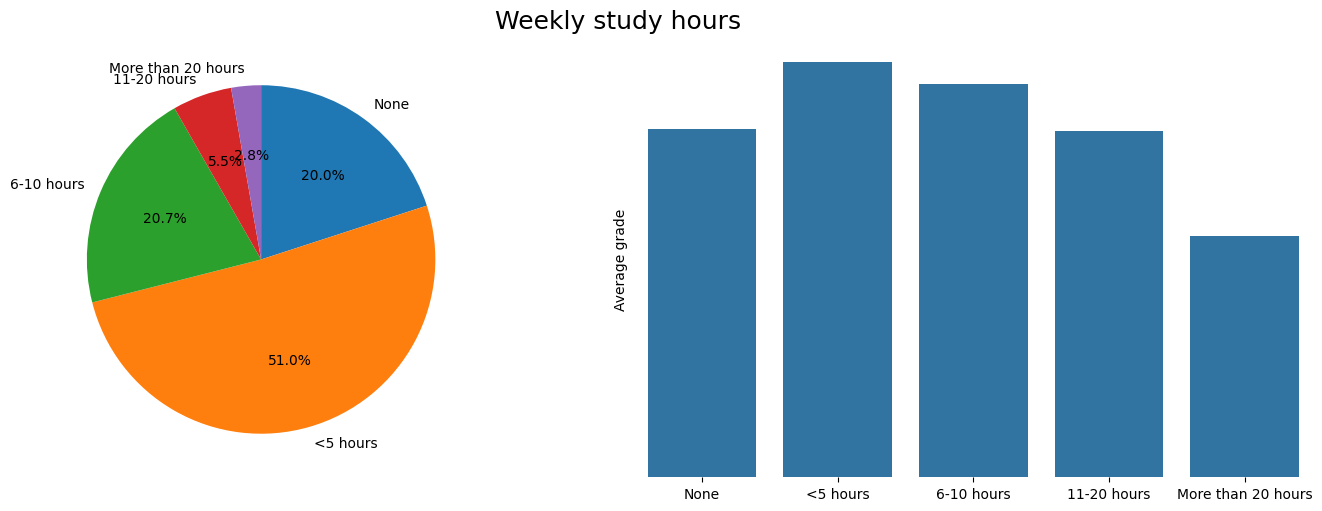

In [57]:
#study
order = list(renaming['study_hrs'].values())
data = df['study_hrs'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
data = df.groupby('study_hrs')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Weekly study hours', fontsize=18)
plt.show()

studying moderately has a bigger impact
spending too much time studying has a bad impact than not studying at all

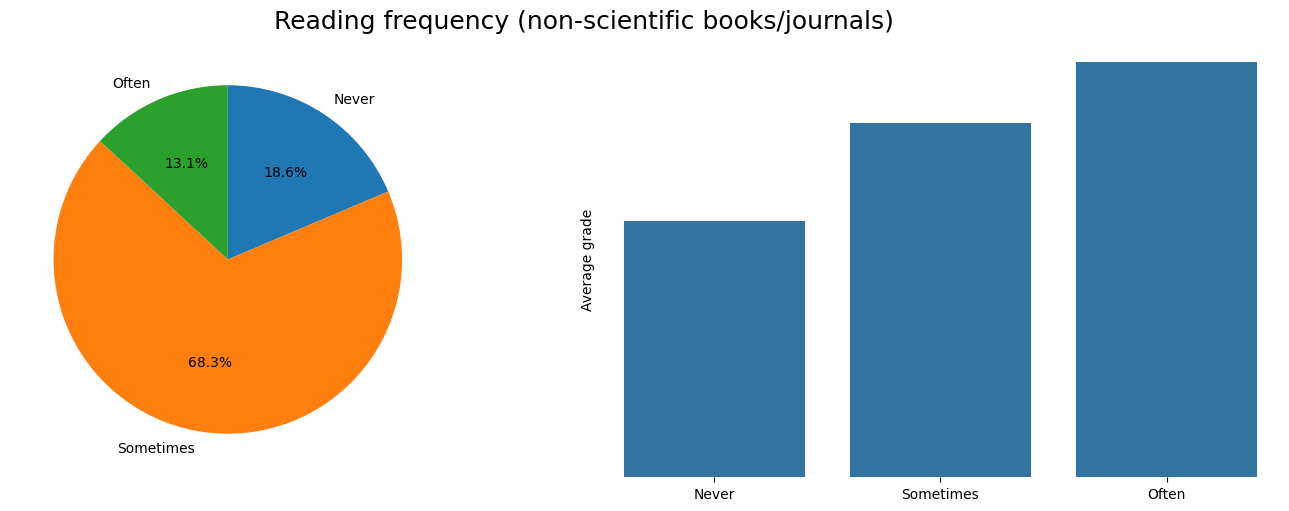

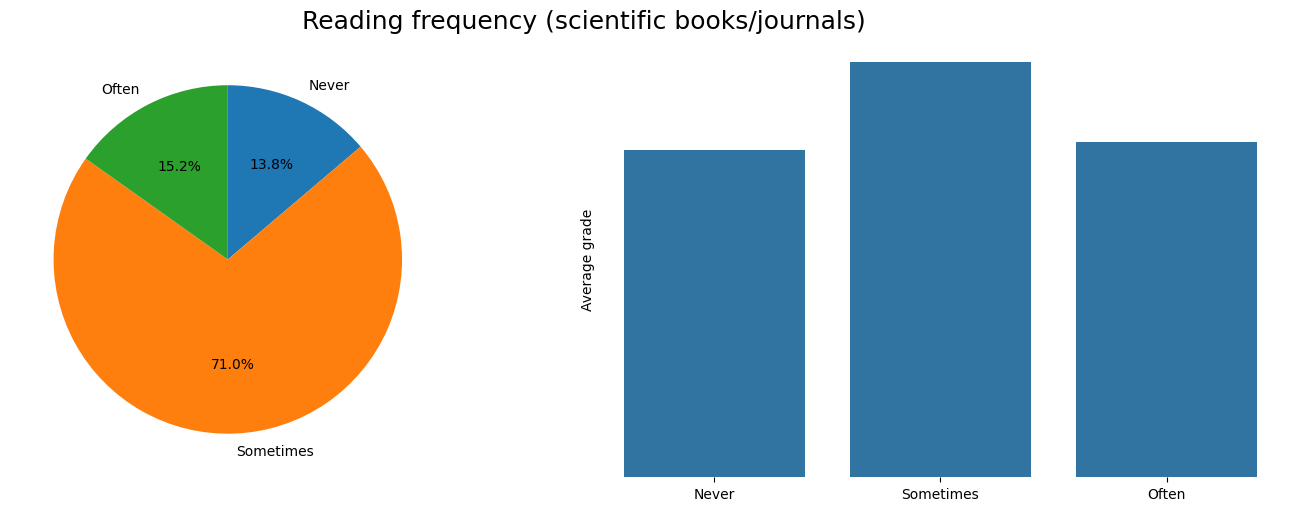

In [ ]:
order = list(renaming['read_freq'].values())
data = df['read_freq'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
data = df.groupby('read_freq')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Reading frequency (non-scientific books/journals)', fontsize=18)
plt.show()


order = list(renaming['read_freq_sci'].values())
data = df['read_freq_sci'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
data = df.groupby('read_freq_sci')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Reading frequency (scientific books/journals)', fontsize=18)
plt.show()

reading is always good
it has an impact on garde 

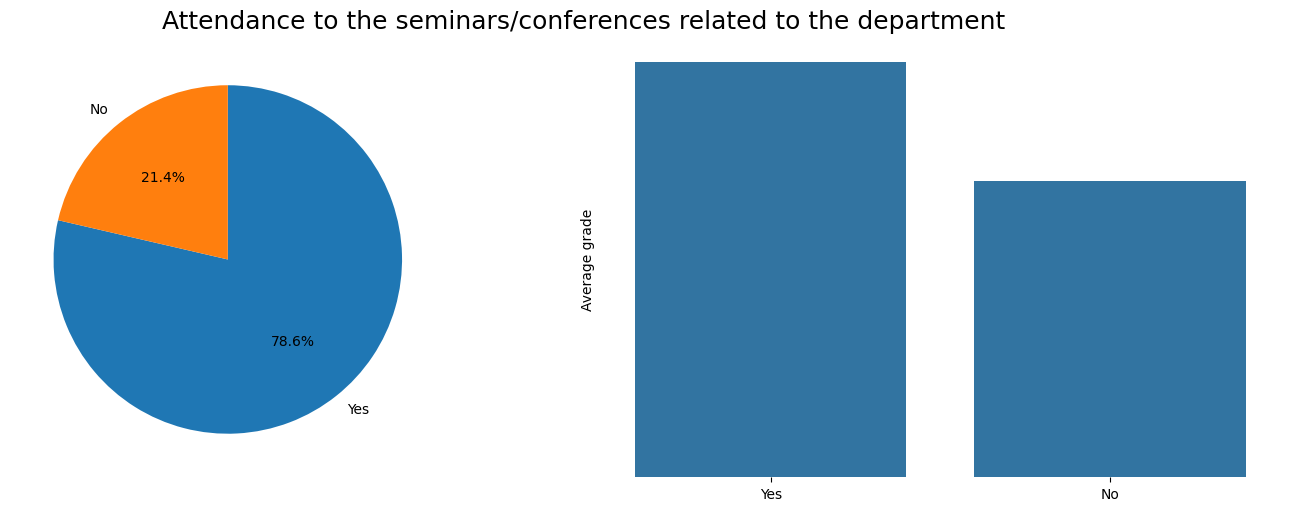

In [60]:
data = df['attend_dept'].value_counts(normalize=True) * 100

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')

data = df.groupby('attend_dept')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Attendance to the seminars/conferences related to the department', fontsize=18)
plt.show()

attenting conferences based on the departamen has a good impact

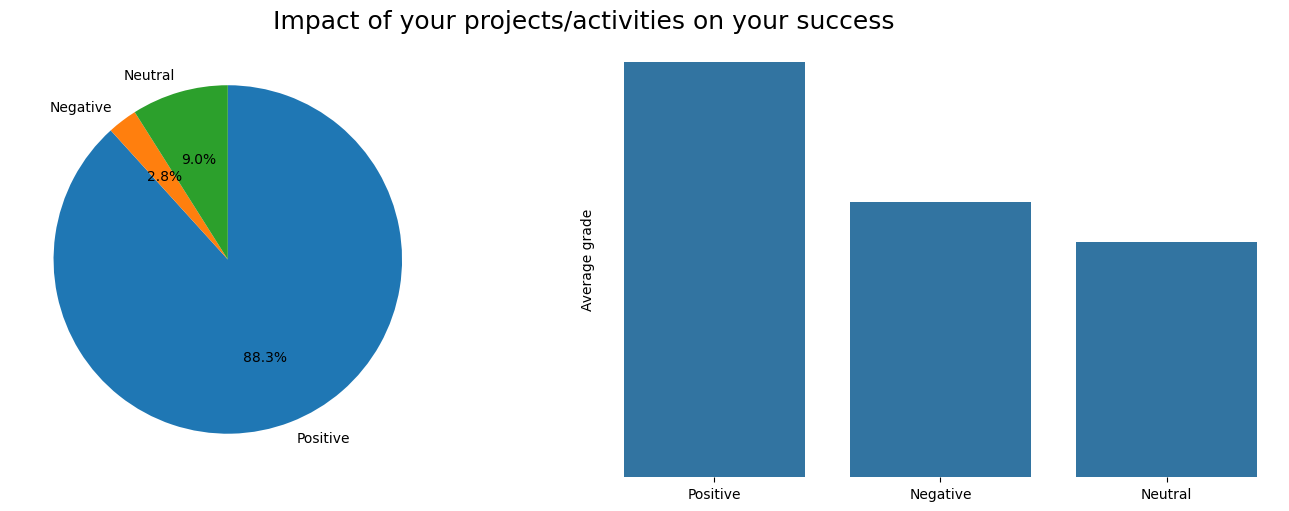

In [63]:
order = list(renaming['impact'].values())
data = df['impact'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
data = df.groupby('impact')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Impact of your projects/activities on your success', fontsize=18)
plt.show()

of course, the more activities you have, the more you develop and get better grades

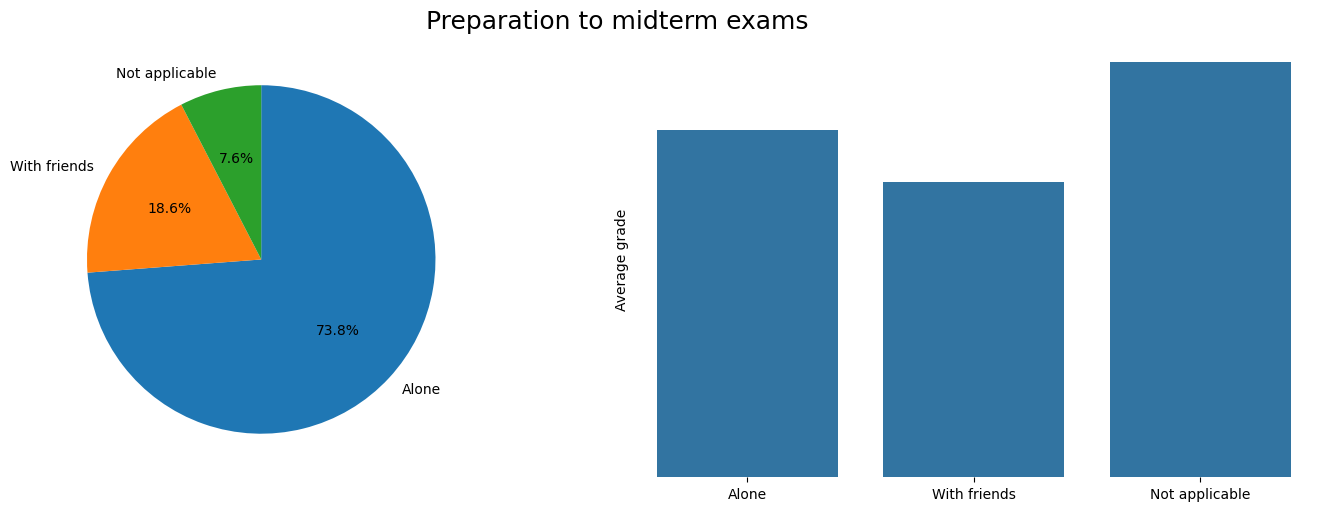

In [64]:
order = list(renaming['prep_study'].values())
data = df['prep_study'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
data = df.groupby('prep_study')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Preparation to midterm exams', fontsize=18)
plt.show()

studying alone gives better results

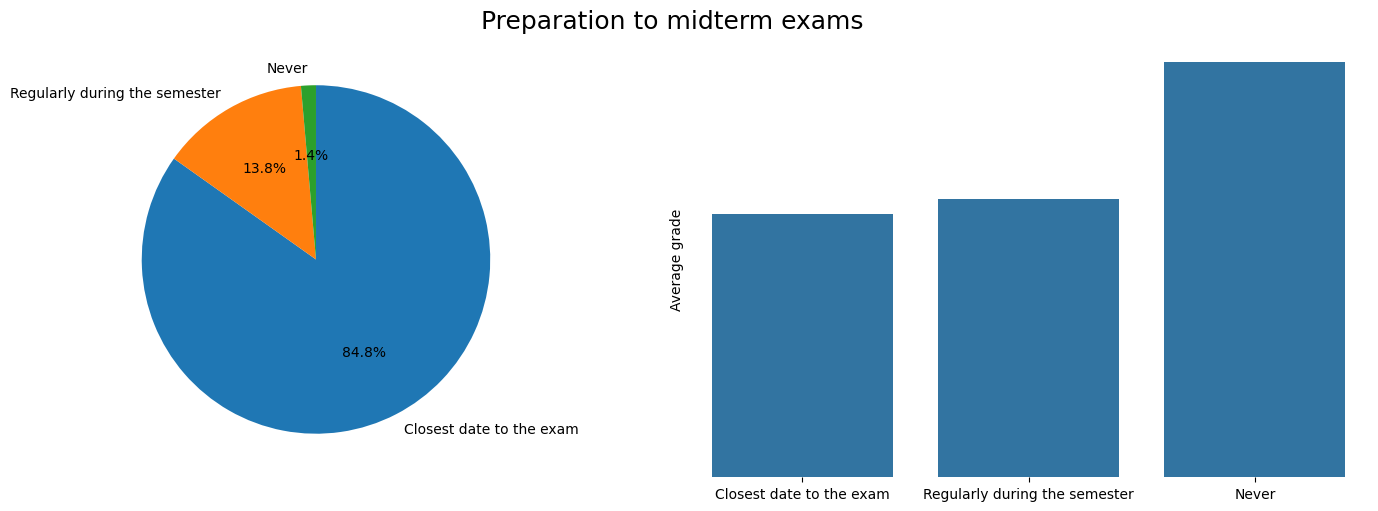

In [65]:
order = list(renaming['prep_exam'].values())
data = df['prep_exam'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
data = df.groupby('prep_exam')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Preparation to midterm exams', fontsize=18)
plt.show()

some students that never study from the dataset, make this data look strange and missleading..

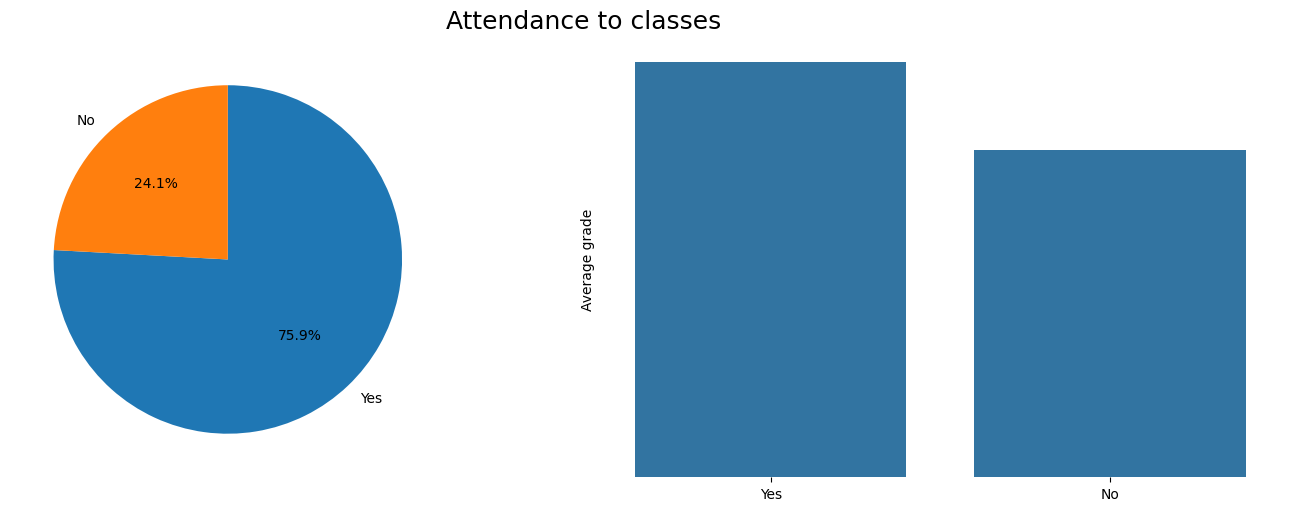

In [66]:
order = list(renaming['attend'].values())
data = df['attend'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
data = df.groupby('attend')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Attendance to classes', fontsize=18)
plt.show()

of course, attending classes influences positively the grade

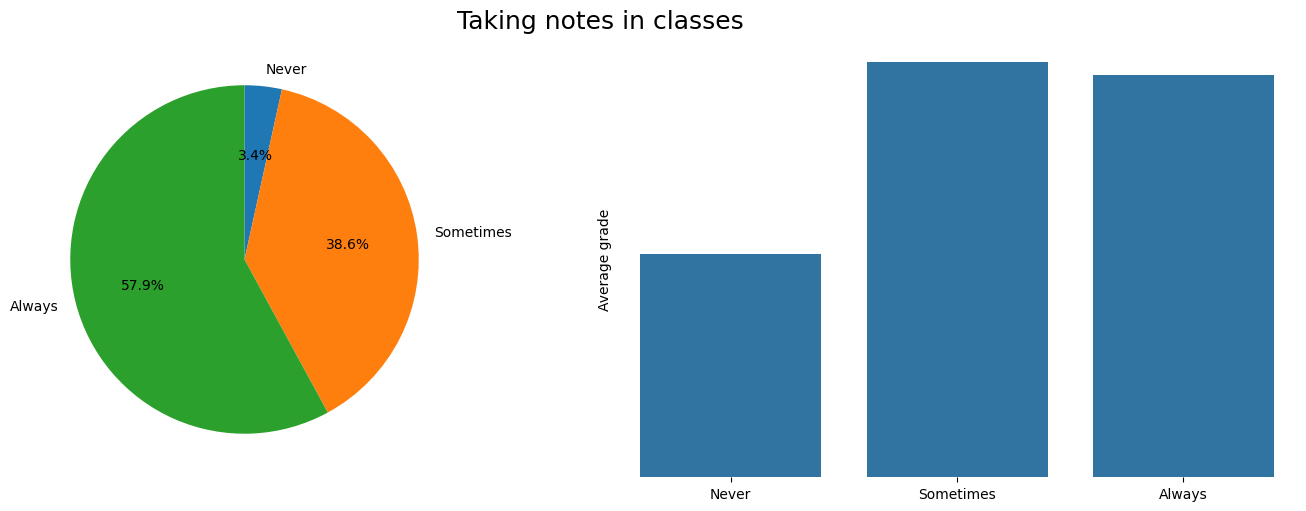

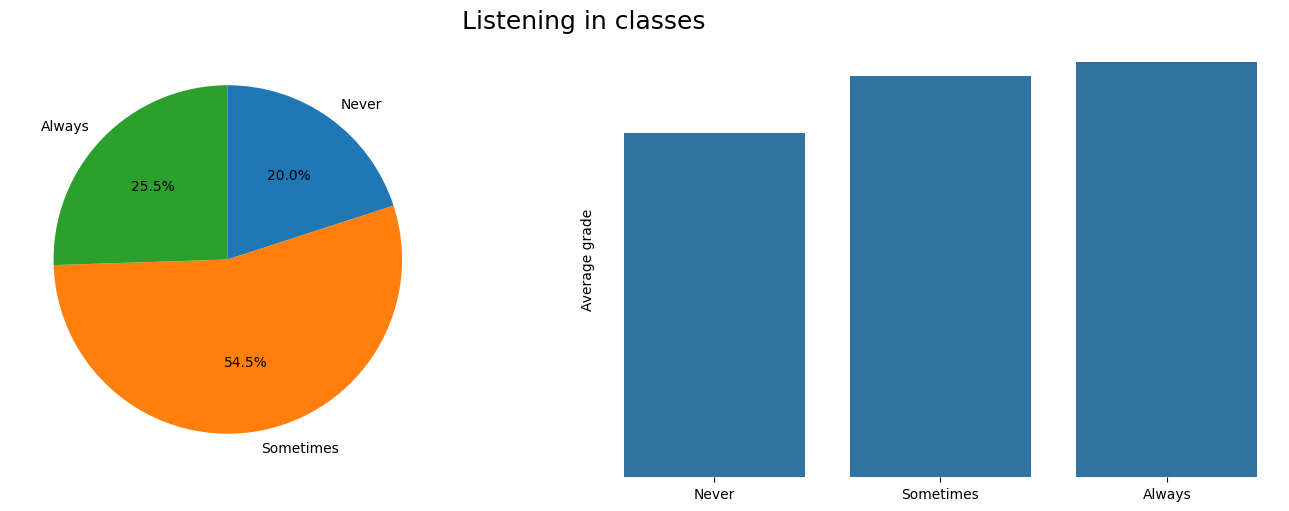

In [ ]:
order = list(renaming['notes'].values())
data = df['notes'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
data = df.groupby('notes')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Taking notes in classes', fontsize=18)
plt.show()


order = list(renaming['listens'].values())
data = df['listens'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
data = df.groupby('listens')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Listening in classes', fontsize=18)
plt.show()

as expected, taking notes and listening in class results in better grades

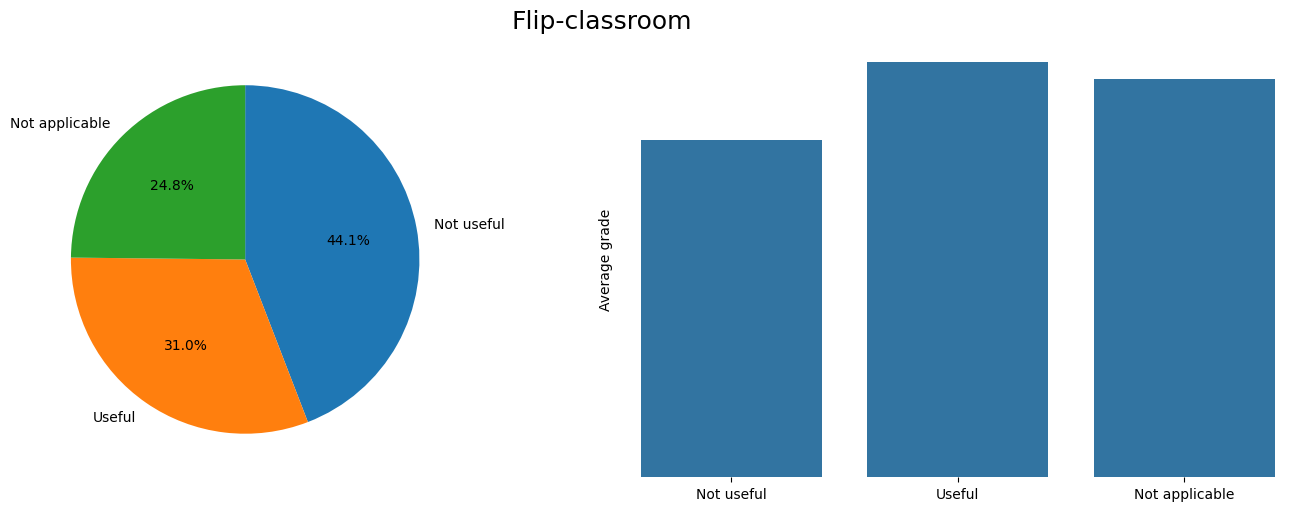

In [84]:
order = list(renaming['classroom'].values())
data = df['classroom'].value_counts(normalize=True) * 100
data = data.loc[order]

fig = plt.figure(figsize=(14, 5), constrained_layout=True)

plt.subplot(121)
plt.pie(data, labels=data.index, startangle=90, counterclock=False, autopct='%1.1f%%')
data = df.groupby('classroom')['grade'].mean().sort_values(ascending=False)

plt.subplot(122)
bp = sns.barplot(x=data.index, y=data, order=order)
plt.xlabel('')
plt.ylabel('Average grade')
plt.yticks([])
plt.box(False)

fig.suptitle('Flip-classroom', fontsize=18)
plt.show()

using this tehnique improves grades

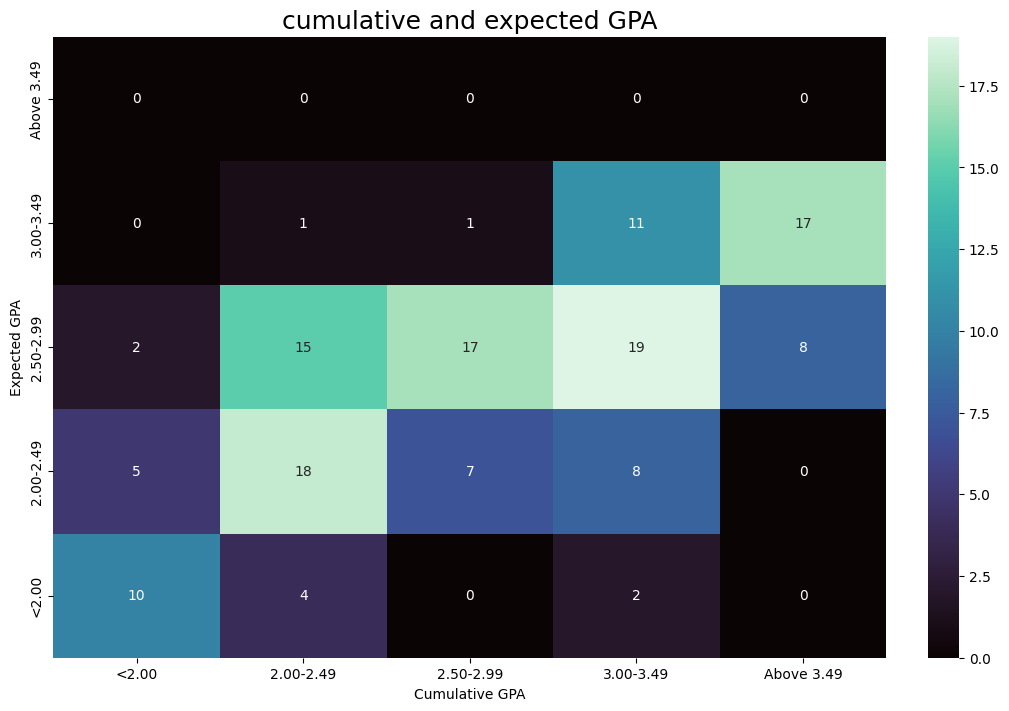

In [85]:
order = list(renaming['cuml_gpa'].values())
gpa_sort_key = {v:k for k, v in renaming['cuml_gpa'].items()}

data = df.groupby(['cuml_gpa', 'exp_gpa']).size().reset_index()
data.sort_values(by=['cuml_gpa', 'exp_gpa'], key=lambda x: x.map(gpa_sort_key), inplace=True)
data.rename(columns={0: 'counts'}, inplace=True)
data = data.pivot(index='cuml_gpa', columns='exp_gpa').fillna(0)
data.columns = data.columns.droplevel(0)
data = data.loc[order]
data[order[-1]] = 0
order.reverse()
data = data[order]

plt.figure(figsize=(10, 7), constrained_layout=True)
sns.heatmap(data.T.astype(int), annot=True, fmt='d', cmap='mako')
plt.xlabel('Cumulative GPA')
plt.ylabel('Expected GPA')
plt.title('cumulative and expected GPA', fontsize=18)
plt.show()

students with higher grades don't expect to get better grades than they have

students with lower grades expect to perform better

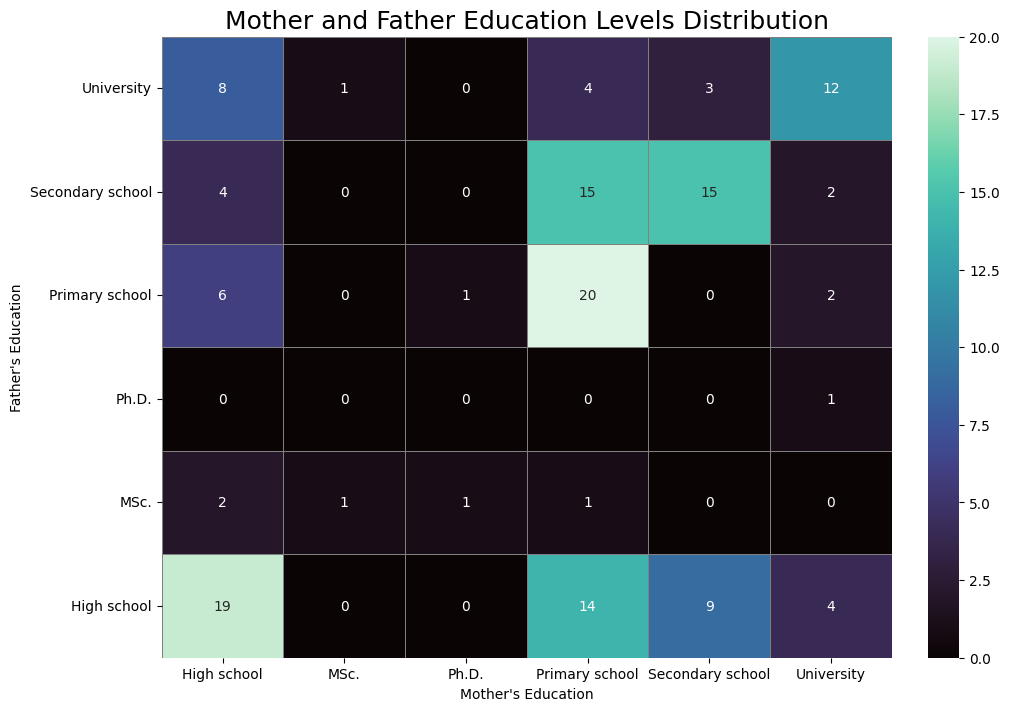

In [27]:
order_mother_edu = sorted(list(df['mother_edu'].unique()))
order_father_edu = sorted(list(df['father_edu'].unique()), reverse=True)

data = df.groupby(['mother_edu', 'father_edu']).size().reset_index(name='counts')

data_pivot = data.pivot(index='mother_edu', columns='father_edu', values='counts').fillna(0)

data_pivot = data_pivot.loc[order_mother_edu] 
data_pivot = data_pivot[order_father_edu] 

plt.figure(figsize=(10, 7), constrained_layout=True)
sns.heatmap(data_pivot.T.astype(int), annot=True, fmt='d', cmap='mako', linewidths=0.5, linecolor='gray')
plt.xlabel('Mother\'s Education')
plt.ylabel('Father\'s Education')
plt.title('Mother and Father Education Levels Distribution', fontsize=18)
plt.show()


I liked the idea from here -> people tend to marry the ones who have the same education